In [ ]:
# Importing some of the packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import os
import bamboolib 
import emoji
import datetime
import plotly as py
#import plotly.plotly as pya



# for all NLP related operations on text
import advertools as adv # analysis tool
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To mock web-browser and scrap tweets
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# To consume Twitter's API
import tweepy
from tweepy import OAuthHandler 

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /home/user/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading pac

**Importing data**
NB. you could have renamed the file in your own way, please adjust it.

In [2]:
mined_data = pd.read_csv('/home/user/Downloads/livetweets-v3.csv')
# rename all the columns by replacing '.' with '_'
mined_data.columns = mined_data.columns.str.replace('.', '_')
# Making all text to be lower case
mined_data["text"].str.lower()
mined_data.head()

,@timestamp,@version,_id,_index,_score,_type,contributors,coordinates,created_at,display_text_range,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,"January 16th 2020, 11:15:38.000",1,VGmjrW8Bx-vOiSY4FbVc,live_tweets_v2,NaN,doc,NaN,NaN,Thu Jan 16 09:15:38 +0000 2020,"[""53"",""95""]",...,333333,True,False,potenzachip,"1,106",NaN,none,http://www.sijolocable.co.za,NaN,False
1,"January 16th 2020, 11:15:04.000",1,U2mirW8Bx-vOiSY4j7WU,live_tweets_v2,NaN,doc,NaN,NaN,Thu Jan 16 09:15:04 +0000 2020,"[""0"",""140""]",...,333333,False,False,SAgovnews,"63,762",NaN,none,http://www.sanews.gov.za,NaN,True
2,"January 16th 2020, 11:15:03.000",1,UmmirW8Bx-vOiSY4jbUo,live_tweets_v2,NaN,doc,NaN,NaN,Thu Jan 16 09:15:03 +0000 2020,"[""42"",""140""]",...,333333,True,False,jillianalcott,"37,702",NaN,none,NaN,NaN,False
3,"January 16th 2020, 11:15:02.000",1,UWmirW8Bx-vOiSY4irXL,live_tweets_v2,NaN,doc,NaN,NaN,Thu Jan 16 09:15:02 +0000 2020,NaN,...,333333,True,False,BisratGenet,34,NaN,none,NaN,NaN,False
4,"January 16th 2020, 11:14:08.000",1,UGmhrW8Bx-vOiSY4tbU4,live_tweets_v2,NaN,doc,NaN,NaN,Thu Jan 16 09:14:08 +0000 2020,NaN,...,000000,False,False,Russell_Olivier,"8,049",NaN,none,NaN,NaN,False


2020-01-23 14:12:33,592 | INFO | utils.py:141 | _init_num_threads | NumExpr defaulting to 4 threads.


Data dimentions: (2436, 331)
Looks like we not winning, there is a lot of amputations, feature engineering, etc that we need to do ... .


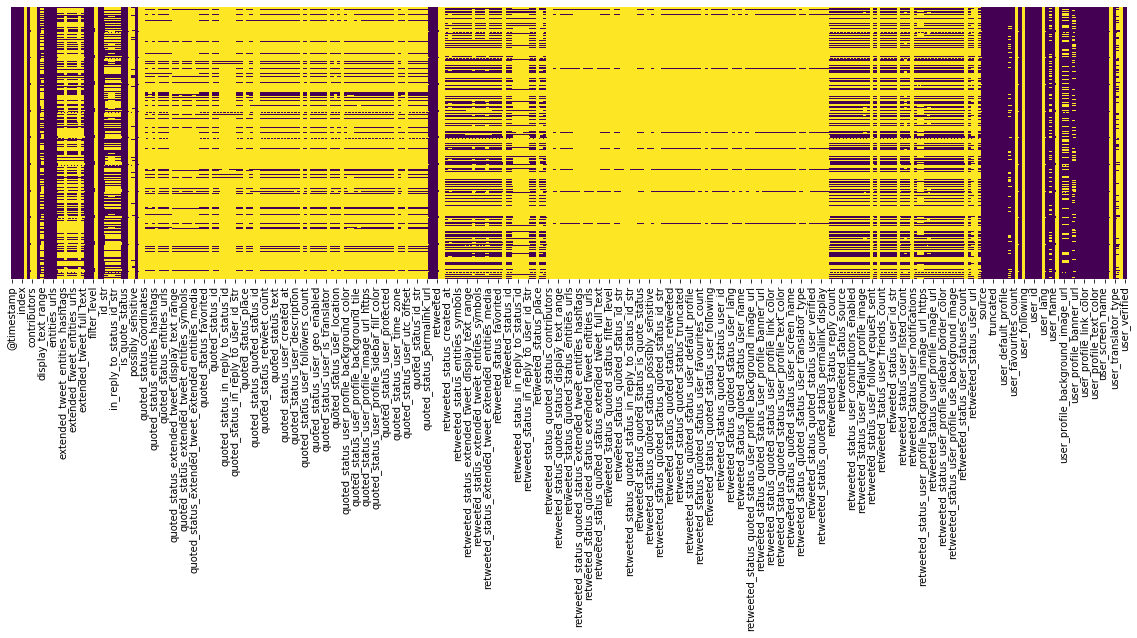

In [3]:
print('Data dimentions:',mined_data.shape)
# Visualising if the data is does not have nulls.

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(mined_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(emoji.emojize('Looks like we not winning, there is a lot of amputations, feature engineering, etc that we need to do ... .' ))

In [4]:
print(emoji.emojize('As a way to double check, \U0001f914, this gives the number of missing values for each column, for us to better understand the data.' ))
print(mined_data.apply(lambda x: sum(x.isnull()),axis=0))
print(emoji.emojize('We are certain the data is not clean at all, \U0001f914'))

As a way to double check, 🤔, this gives the number of missing values for each column, for us to better understand the data.
@timestamp                                    0
@version                                      0
_id                                           0
_index                                        0
_score                                     2436
_type                                         0
contributors                               2436
coordinates                                2436
created_at                                    0
display_text_range                         1488
entities_hashtags                             0
entities_symbols                              0
entities_urls                                 0
entities_user_mentions                        0
extended_tweet_display_text_range          1584
extended_tweet_entities_hashtags           1584
extended_tweet_entities_media              2343
extended_tweet_entities_symbols            1584
extended_twe

In [5]:
Class_1 = mined_data.select_dtypes(exclude = ['object']).columns.tolist()
Class_2 = mined_data.select_dtypes(include = ['object']).columns.tolist()
# print('Non-Categorical Variables:',Class_1)
# print('Categorical Variables:',Class_2)
print('No. of Non-Categorical Vars', len(Class_1))
print('No. of Categorical Vars', len(Class_2))

No. of Non-Categorical Vars 86
No. of Categorical Vars 245


### Zooming Class_1 vars for nulls

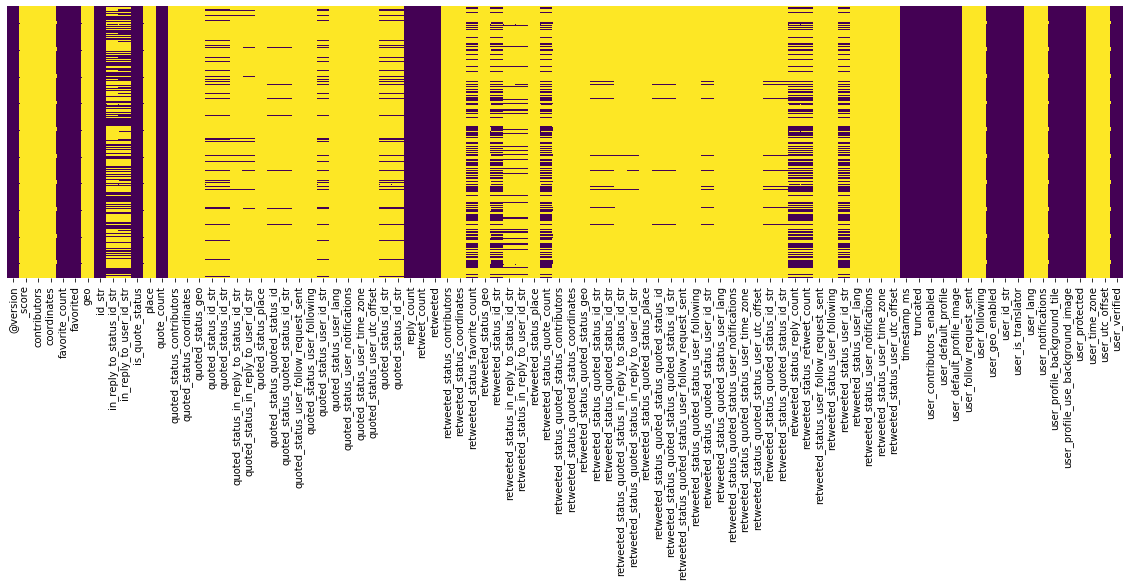

In [6]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(mined_data[Class_1].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
print(mined_data[Class_1].apply(lambda x: sum(x.isnull()),axis=0))

@version                                             0
_score                                            2436
contributors                                      2436
coordinates                                       2436
favorite_count                                       0
favorited                                            0
geo                                               2436
id_str                                               0
in_reply_to_status_id_str                         1529
in_reply_to_user_id_str                           1355
is_quote_status                                      0
place                                             2436
quote_count                                          0
quoted_status_contributors                        2436
quoted_status_coordinates                         2436
quoted_status_geo                                 2436
quoted_status_id_str                              2061
quoted_status_id_str                              2061
quoted_sta

### Zooming Class_2 vars for nulls

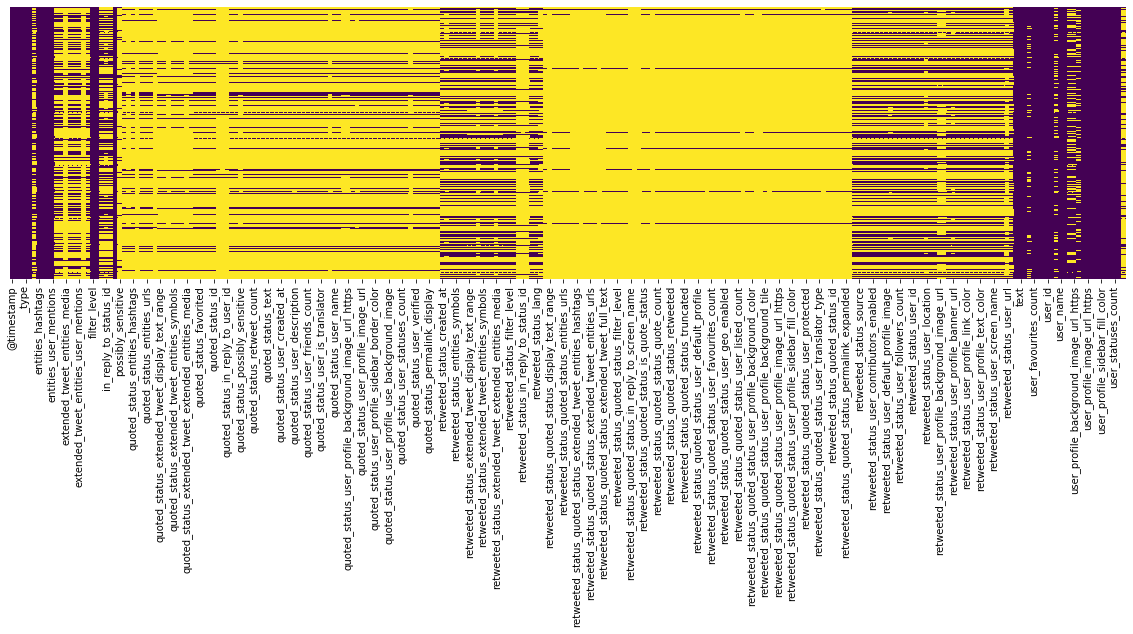

In [8]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(mined_data[Class_2].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
print(mined_data[Class_2].apply(lambda x: sum(x.isnull()),axis=0))

@timestamp                                    0
_id                                           0
_index                                        0
_type                                         0
created_at                                    0
display_text_range                         1488
entities_hashtags                             0
entities_symbols                              0
entities_urls                                 0
entities_user_mentions                        0
extended_tweet_display_text_range          1584
extended_tweet_entities_hashtags           1584
extended_tweet_entities_media              2343
extended_tweet_entities_symbols            1584
extended_tweet_entities_urls               1584
extended_tweet_entities_user_mentions      1584
extended_tweet_extended_entities_media     2343
extended_tweet_full_text                   1584
filter_level                                  0
id                                            0
in_reply_to_screen_name                 

In [10]:
# Total count of what is null and what is not

print('Total empty columns:', len(mined_data.columns) - len(mined_data.dropna(axis=1,how='all').columns))
filtered_class_1 = mined_data[Class_1].dropna(axis='columns', how='all')
print('Non-empty Class_1 columns:', len(filtered_class_1.columns))
filtered_class_2 = mined_data[Class_2].dropna(axis='columns', how='all')
print('Non-empty Class_2 columns:', len(filtered_class_2.columns))

Total empty columns: 41
Non-empty Class_1 columns: 49
Non-empty Class_2 columns: 249


In [11]:
filtered_class_1.head()
filtered_class_2.head()

,@timestamp,_id,_index,_type,created_at,display_text_range,entities_hashtags,entities_symbols,entities_urls,entities_user_mentions,...,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_screen_name,user_statuses_count,user_translator_type,user_url
0,"January 16th 2020, 11:15:38.000",VGmjrW8Bx-vOiSY4FbVc,live_tweets_v2,doc,Thu Jan 16 09:15:38 +0000 2020,"[""53"",""95""]",[],[],[],"[{""name"":""I am Human"",""screen_name"":""o0KeepitR...",...,http://pbs.twimg.com/profile_images/7641532352...,https://pbs.twimg.com/profile_images/764153235...,1DA1F2,C0DEED,DDEEF6,333333,potenzachip,"1,106",none,http://www.sijolocable.co.za
1,"January 16th 2020, 11:15:04.000",U2mirW8Bx-vOiSY4j7WU,live_tweets_v2,doc,Thu Jan 16 09:15:04 +0000 2020,"[""0"",""140""]",[],[],"[{""expanded_url"":""https://twitter.com/i/web/st...",[],...,http://pbs.twimg.com/profile_images/1199950051...,https://pbs.twimg.com/profile_images/119995005...,990000,DFDFDF,F3F3F3,333333,SAgovnews,"63,762",none,http://www.sanews.gov.za
2,"January 16th 2020, 11:15:03.000",UmmirW8Bx-vOiSY4jbUo,live_tweets_v2,doc,Thu Jan 16 09:15:03 +0000 2020,"[""42"",""140""]","[{""text"":""Zuma"",""indices"":[56,61]}]",[],"[{""expanded_url"":""https://twitter.com/i/web/st...","[{""name"":""I'm Sh*cked"",""screen_name"":""Kawasaki...",...,http://pbs.twimg.com/profile_images/1118457029...,https://pbs.twimg.com/profile_images/111845702...,0084B4,FFFFFF,DDEEF6,333333,jillianalcott,"37,702",none,NaN
3,"January 16th 2020, 11:15:02.000",UWmirW8Bx-vOiSY4irXL,live_tweets_v2,doc,Thu Jan 16 09:15:02 +0000 2020,NaN,[],[],[],[],...,http://abs.twimg.com/sticky/default_profile_im...,https://abs.twimg.com/sticky/default_profile_i...,1DA1F2,C0DEED,DDEEF6,333333,BisratGenet,34,none,NaN
4,"January 16th 2020, 11:14:08.000",UGmhrW8Bx-vOiSY4tbU4,live_tweets_v2,doc,Thu Jan 16 09:14:08 +0000 2020,NaN,[],[],[],"[{""name"":""Gui VanVeen"",""screen_name"":""GuiVanVe...",...,http://pbs.twimg.com/profile_images/2869210188...,https://pbs.twimg.com/profile_images/286921018...,1B95E0,000000,000000,000000,Russell_Olivier,"8,049",none,NaN


In [12]:
#barplot function

def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

In [13]:
total_len = mined_data.shape[0]
percentage_labels = (mined_data['@timestamp'].value_counts()/total_len)*100
percentage_labels

January 16th 2020, 08:35:15.000    0.123153
January 16th 2020, 07:40:00.000    0.082102
January 15th 2020, 19:18:37.000    0.082102
January 16th 2020, 09:14:50.000    0.082102
January 16th 2020, 09:18:21.000    0.082102
January 16th 2020, 09:53:57.000    0.082102
January 15th 2020, 23:17:58.000    0.082102
January 16th 2020, 07:46:18.000    0.082102
January 16th 2020, 07:00:59.000    0.082102
January 15th 2020, 20:25:45.000    0.082102
January 16th 2020, 09:29:38.000    0.082102
January 16th 2020, 10:30:47.000    0.082102
January 15th 2020, 21:24:49.000    0.082102
January 15th 2020, 22:18:19.000    0.082102
January 15th 2020, 20:56:20.000    0.082102
January 15th 2020, 21:23:02.000    0.082102
January 16th 2020, 09:13:52.000    0.082102
January 16th 2020, 09:33:48.000    0.082102
January 15th 2020, 22:22:38.000    0.082102
January 15th 2020, 23:05:28.000    0.082102
January 15th 2020, 21:09:35.000    0.082102
January 15th 2020, 21:08:36.000    0.082102
January 16th 2020, 08:22:38.000 

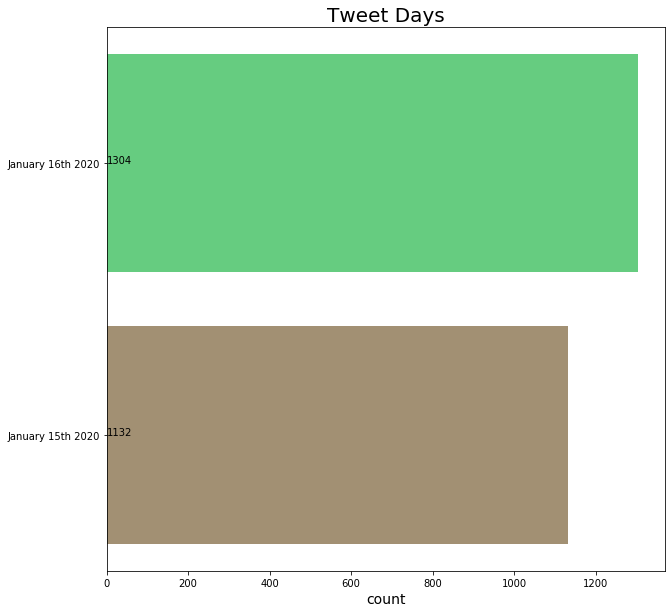

In [14]:
mined_data['@timestamp'] = mined_data['@timestamp'].map(lambda x: str(x)[:-14]) #14
mined_data['@timestamp'][:10]

count =  mined_data['@timestamp'].value_counts()
drawbarplot(x=count.values,y=count.index, xlabel='count',title='Tweet Days',figsize=(10,10))

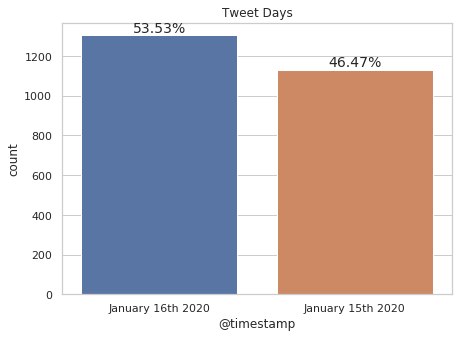

In [15]:
sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(mined_data['@timestamp']).set_title('Tweet Days')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
# ax.set_xlabel("Labels for status")
ax.set_ylabel("count")
plt.show()

In [16]:
total_len = len(mined_data['@timestamp'])
percentage_labels = (mined_data['@timestamp'].value_counts()/total_len)*100
percentage_labels

January 16th 2020    53.530378
January 15th 2020    46.469622
Name: @timestamp, dtype: float64

In [17]:
mined_data['@timestamp'].value_counts()

January 16th 2020    1304
January 15th 2020    1132
Name: @timestamp, dtype: int64

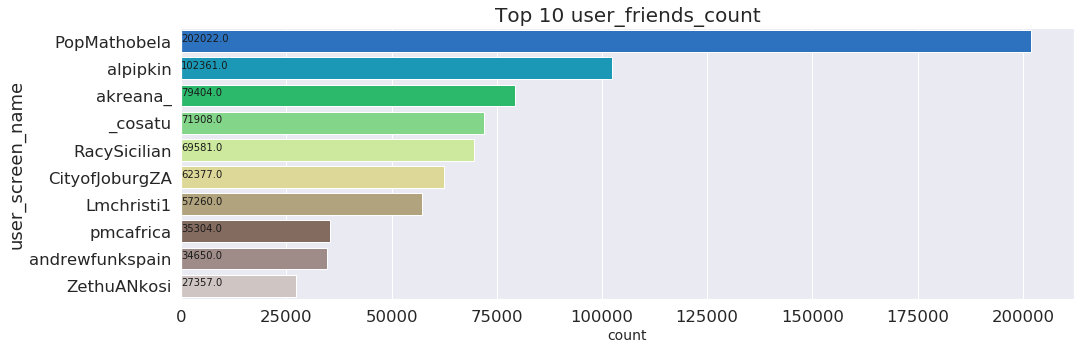

In [18]:
# casting all the nums as floats to cater for counts
mined_data['user_friends_count'] = mined_data['user_friends_count'].str.replace(',', '').astype(float)

#Which user has most number of Friend on twitter
df_userFriend = mined_data.loc[:,['user_screen_name','user_friends_count']]
df_userFriend.sort_values(by='user_friends_count',ascending=False,inplace=True)
df_userFriend.drop_duplicates(subset='user_screen_name',keep='first',inplace=True)
df_count = df_userFriend.iloc[:10,:]
drawbarplot(x=df_count.user_friends_count, y=df_count.user_screen_name, xlabel='count',title='Top 10 user_friends_count',figsize=(16,5))

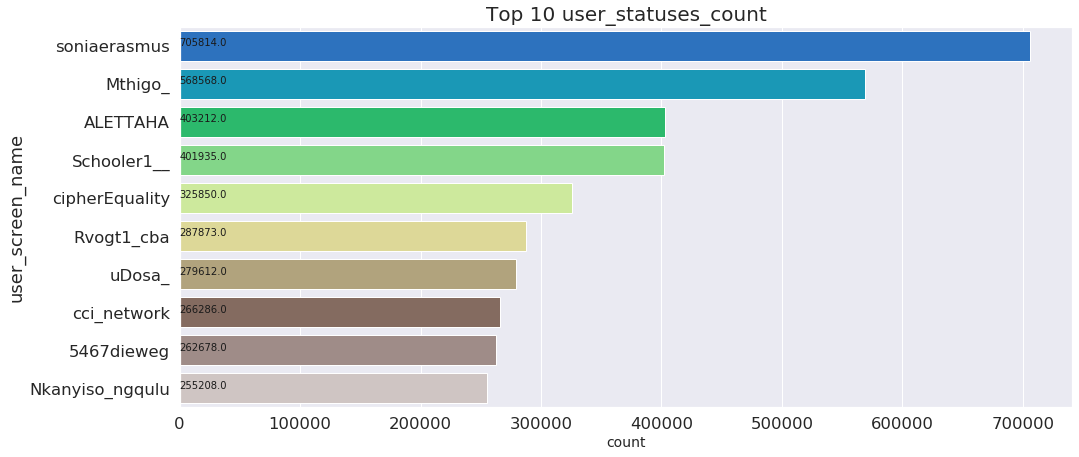

In [19]:
mined_data['user_statuses_count'] = mined_data['user_statuses_count'].str.replace(',', '').astype(float)
mined_data['user_statuses_count'].head()

df_tweetcount = mined_data.loc[:,['user_screen_name','user_statuses_count']]
df_tweetcount.sort_values(by='user_statuses_count',ascending=False,inplace=True)
df_tweetcount.drop_duplicates(subset='user_screen_name',keep='first',inplace=True)
df_count=pd.DataFrame()
df_count = df_tweetcount.iloc[:10,:]
drawbarplot(x=df_count.user_statuses_count, y=df_count.user_screen_name, xlabel='count',title='Top 10 user_statuses_count',figsize=(16,7))

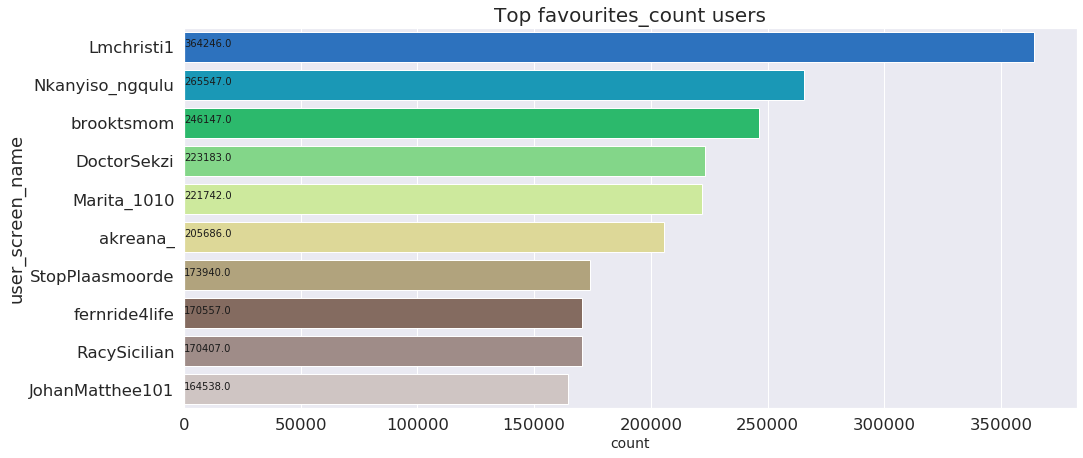

In [20]:
mined_data['user_favourites_count'] = mined_data['user_favourites_count'].str.replace(',', '').astype(float)
mined_data['user_statuses_count'].head()

df_userfollower = mined_data.loc[:,['user_screen_name','user_favourites_count']]
df_userfollower.sort_values(by='user_favourites_count',ascending=False,inplace=True)
df_userfollower.drop_duplicates(subset='user_screen_name',keep='first',inplace=True)
df_count =df_userfollower.iloc[:10,:]
drawbarplot(x=df_count.user_favourites_count, y=df_count.user_screen_name, xlabel='count',title='Top favourites_count users',figsize=(16,7))

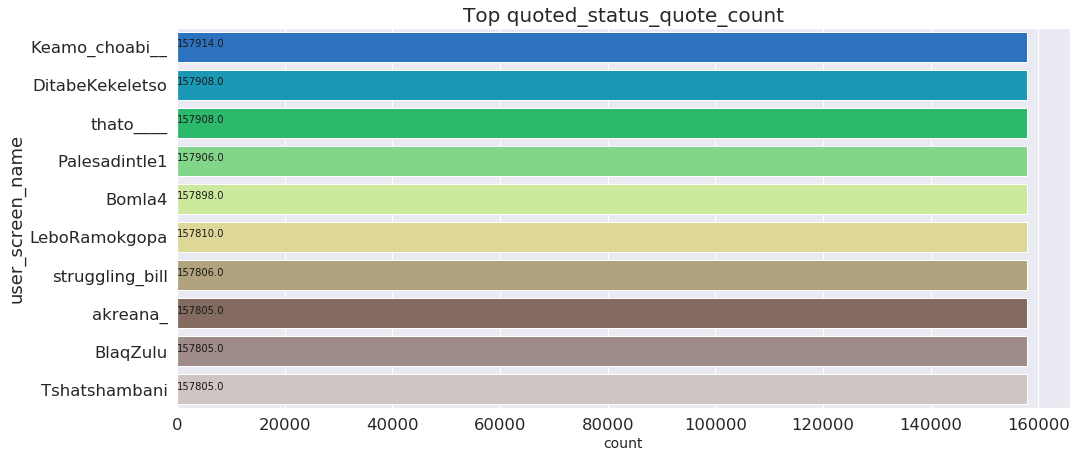

In [21]:
mined_data['quoted_status_quote_count'] = mined_data['quoted_status_quote_count'].dropna(how='any')
mined_data['quoted_status_quote_count'] = mined_data['quoted_status_quote_count'].str.replace(',', '').astype(float)
mined_data['quoted_status_quote_count'].head()

df_userfollower = mined_data.loc[:,['user_screen_name','quoted_status_quote_count']]
df_userfollower.sort_values(by='quoted_status_quote_count',ascending=False,inplace=True)
df_userfollower.drop_duplicates(subset='user_screen_name',keep='first',inplace=True)
df_count =df_userfollower.iloc[:10,:]
drawbarplot(x=df_count.quoted_status_quote_count, y=df_count.user_screen_name, xlabel='count',title='Top quoted_status_quote_count',figsize=(16,7))

In [22]:
#function to extract @mentions and #tags

def extracter():
    mentions={}
    tags={}
    for i in df_trend_user.index:
        tokens = df_trend_user['text'][i].split()    
        for token in tokens:
            if('@' in token[0] and len(token) > 1):
                if token.strip('@') in mentions:
                    mentions[token.strip('@')] += 1
                else:
                    mentions[token.strip('@')] = 1
        
        
            if('#' in token[0] and len(token) > 1):
                if token.strip('#') in tags:
                    tags[token.strip('#')] += 1
                else:
                    tags[token.strip('#')] = 1    
                    
    return mentions,tags    

In [23]:
labels1 = ['user_screen_name','quoted_status_retweet_count','user_favourites_count','user_description','text','quoted_status_quote_count','quoted_status_retweeted','user_favourites_count','favorite_count']
df_trend_user = mined_data.loc[:,labels1]
# df_trend_user.shape

In [24]:
mentions ,tags = extracter()
mentions_keys = list(mentions.keys())
mentions_values = list(mentions.values())
tags_keys = list(tags.keys())
tags_values = list(tags.values())

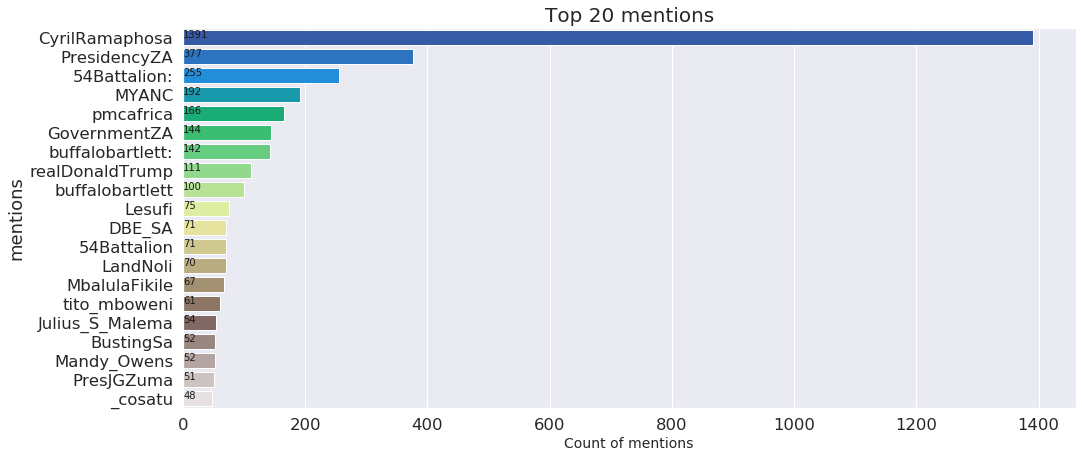

In [25]:
df_mention = pd.DataFrame(columns=['mentions','m_count'])
df_mention['mentions'] = mentions_keys
df_mention['m_count'] = mentions_values
df_mention.sort_values(ascending=False,by='m_count',inplace=True)
df_count = df_mention.iloc[:20,:]
drawbarplot(x=df_count.m_count,y=df_count.mentions,xlabel='Count of mentions',title='Top 20 mentions',figsize=(16,7))

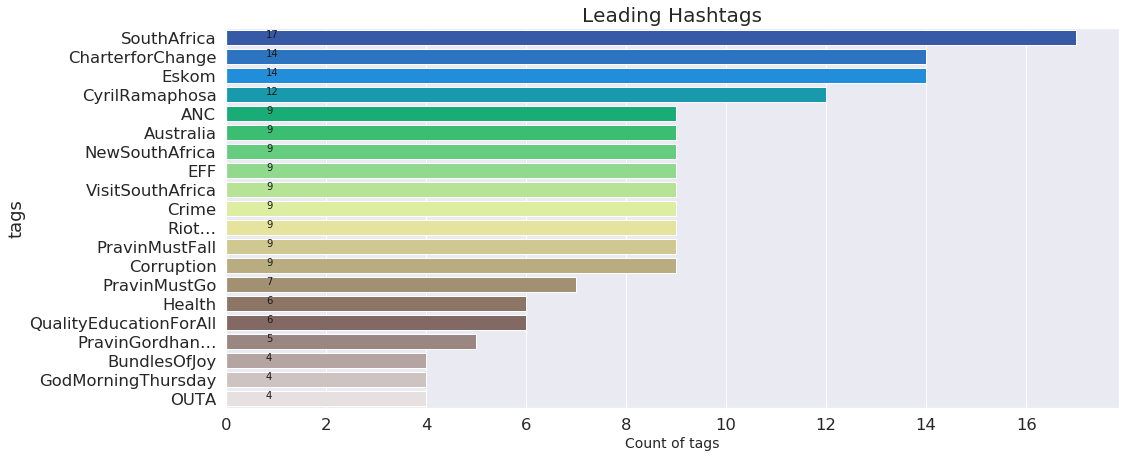

In [26]:
df_tags =pd.DataFrame(columns=['tags','t_count'])
df_tags['tags'] = tags_keys
df_tags['t_count'] = tags_values
df_tags.sort_values(ascending=False,by='t_count',inplace=True)
df_count = df_tags.iloc[:20,:]
drawbarplot(x=df_count.t_count,y=df_count.tags,xlabel='Count of tags',title='Leading Hashtags',figsize=(16,7))

**Further EDA with an extraction library**

In [27]:
# import advertools as adv # analysis tool
[x for x in dir(adv) if x.startswith('extract')]  # currently available extract functions

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_questions',
 'extract_urls',
 'extract_words']

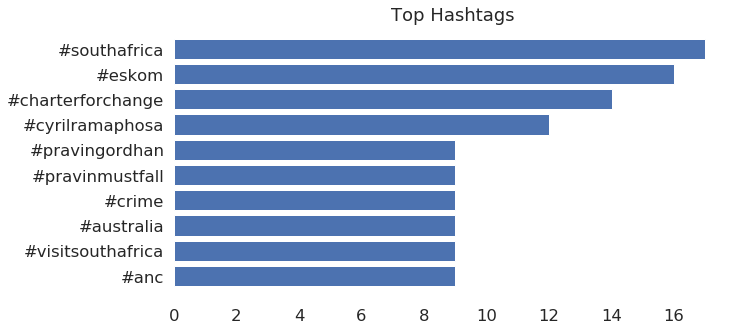

In [28]:
hashtag_summary = adv.extract_hashtags(mined_data['text'])
# hashtag_summary.keys()
# hashtag_summary['top_hashtags'][:10]

plt.figure(facecolor='white', figsize=(10, 5))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][:10]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][:10]][::-1])
plt.title('Top Hashtags')
plt.grid()
plt.gca().set_frame_on(False)

In [29]:
# Emojis
emoji_summary = adv.extract_emoji(mined_data['text'])
emoji_summary['top_emoji'][:20]

[('💔', 97),
 ('😂', 75),
 ('😭', 64),
 ('🤣', 45),
 ('🙄', 10),
 ('😅', 10),
 ('😡', 10),
 ('👇', 9),
 ('🤔', 9),
 ('📖', 6),
 ('👏', 5),
 ('\U0001f92e', 5),
 ('🙏', 5),
 ('😢', 5),
 ('👀', 3),
 ('😔', 3),
 ('🇿🇦', 3),
 ('👏🏽', 3),
 ('\U0001f92f', 3),
 ('😳', 3)]

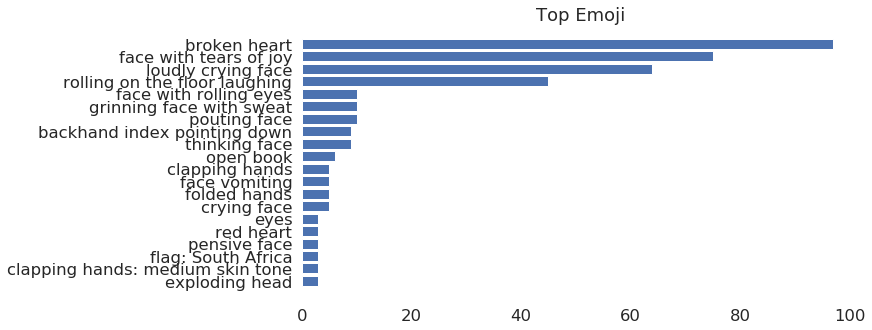

In [30]:
plt.figure(facecolor='white', figsize=(10, 5))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [31]:
# Mentions
mention_summary = adv.extract_mentions(mined_data['text'])
# mention_summary.keys()
mention_summary['top_mentions'][:10]

[('@cyrilramaphosa', 1431),
 ('@presidencyza', 421),
 ('@54battalion', 326),
 ('@buffalobartlett', 242),
 ('@myanc', 205),
 ('@governmentza', 186),
 ('@pmcafrica', 166),
 ('@realdonaldtrump', 111),
 ('@julius_s_malema', 87),
 ('@dbe_sa', 84)]

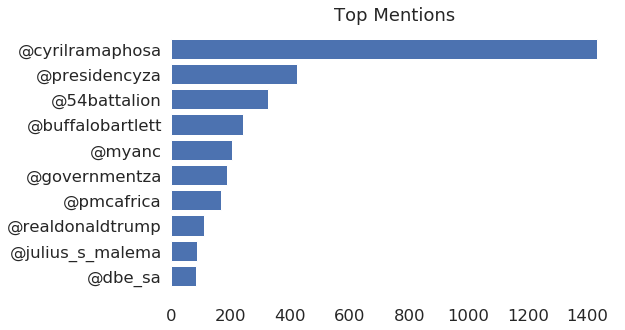

In [32]:
plt.figure(facecolor='white', figsize=(8, 5))
plt.barh([x[0] for x in mention_summary['top_mentions'][:10]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:10]][::-1])
plt.title('Top Mentions')
plt.grid()
plt.gca().set_frame_on(False)

In [33]:
# for x in 
mention_summary['top_mentions'][:10][::-1]

[('@dbe_sa', 84),
 ('@julius_s_malema', 87),
 ('@realdonaldtrump', 111),
 ('@pmcafrica', 166),
 ('@governmentza', 186),
 ('@myanc', 205),
 ('@buffalobartlett', 242),
 ('@54battalion', 326),
 ('@presidencyza', 421),
 ('@cyrilramaphosa', 1431)]

In [34]:
[x[0] for x in mention_summary['top_mentions'][:10]][::-1]

['@dbe_sa',
 '@julius_s_malema',
 '@realdonaldtrump',
 '@pmcafrica',
 '@governmentza',
 '@myanc',
 '@buffalobartlett',
 '@54battalion',
 '@presidencyza',
 '@cyrilramaphosa']

In [35]:
# Questions
url_summary = adv.extract_urls(mined_data['text'])
url_summary.keys()

dict_keys(['urls', 'urls_flat', 'url_counts', 'url_freq', 'top_urls', 'overview', 'top_domains', 'top_tlds'])

In [36]:
# hashtag_summary['url'][:10]

In [37]:
url_summary['urls_flat'][:10]

['https://t.co/RwKd0LYpq4',
 'https://t.co/hOppsH5otz',
 'https://t.co/Idys00a8Ym',
 'https://t.co/luyY8IAYzO',
 'https://t.co/RS9rim9lLO',
 'https://t.co/gR4VPFP66x',
 'https://t.co/aVn42pKrQb',
 'https://t.co/b0uEAregLW',
 'https://t.co/hKm6kCzlYq',
 'https://t.co/qsXFC5pXNe']

In [38]:
url_summary['url_counts'][:20]

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]

In [39]:
url_summary['url_freq'][:15]

[(0, 1556), (1, 872), (2, 7), (3, 1)]

In [40]:
url_summary['top_domains'][:50]

[('t.co', 882), ('t', 7)]

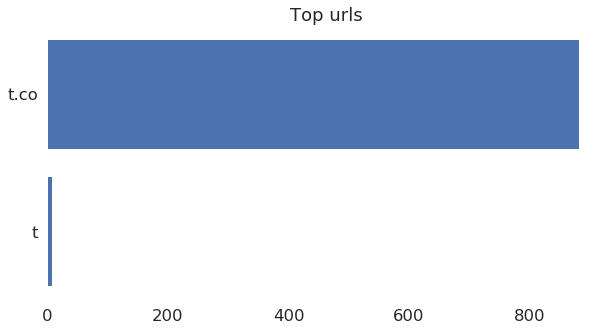

In [41]:
plt.figure(facecolor='white', figsize=(10, 5))
plt.barh([x[0] for x in url_summary['top_domains'][:10]][::-1],
         [x[1] for x in url_summary['top_domains'][:10]][::-1])
plt.title('Top urls')
plt.grid()
plt.gca().set_frame_on(False)

In [42]:
# Questions
question_summary = adv.extract_questions(mined_data['text'])

In [43]:
question_summary['overview']
# 12.13% of the tweets contained questions.

{'num_posts': 2436,
 'num_question_marks': 215,
 'question_marks_per_post': 0.08825944170771757,
 'unique_question_marks': 1}

In [44]:
question_summary['question_mark_freq']

[(0, 2257), (1, 153), (2, 21), (3, 4), (8, 1)]

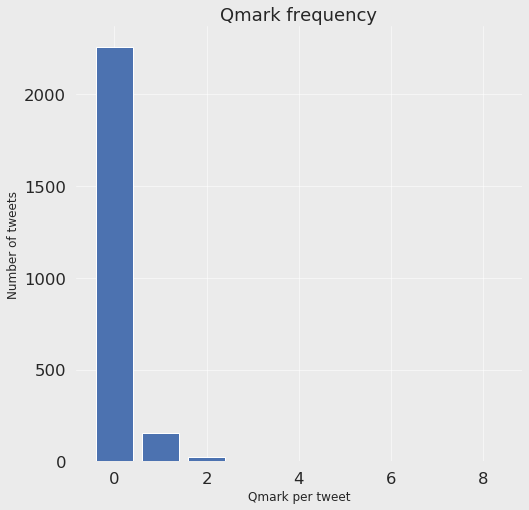

In [45]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in question_summary['question_mark_freq'][:15]],
        [x[1] for x in question_summary['question_mark_freq'][:15]])
plt.title('Qmark frequency', fontsize=18)
plt.xlabel('Qmark per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [46]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 215)]

In [47]:
# Here are of some questions that were asked.
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:5]

[(12,
  ['What are you doing to help change the lives of the least fortunate in our society?']),
 (36,
  ['@tito_mboweni Why are you exposing @CyrilRamaphosa weak leadership like this?']),
 (48,
  ['RT @Sandile170814: @LandNoli , is there a way you can get more info on this?']),
 (61, ['Indeed who has the #Land today?']),
 (63,
  ['@anorkie95 @AntonEberhard @CyrilRamaphosa @MorningLiveSABC Dear @keljabi can u answer the question?'])]

In [48]:
mined_data.shape[0]

2436

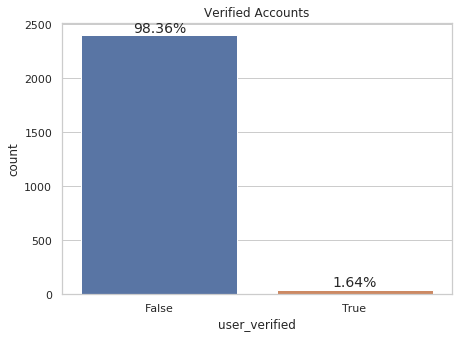

In [49]:
# count =  mined_data['user_verified'].value_counts()
# drawbarplot(x=count.values,y=count.index, xlabel='count',title='Verified Accounts',figsize=(10,10))

total_len = mined_data.shape[0]
percentage_labels = (mined_data['user_verified'].value_counts()/total_len)*100
percentage_labels

sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(mined_data['user_verified']).set_title('Verified Accounts')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
# ax.set_xlabel("Labels for status")
ax.set_ylabel("count")
plt.show()

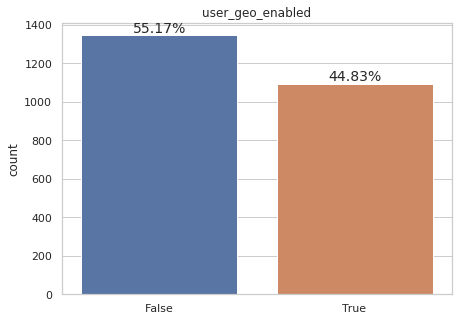

In [50]:
# count =  mined_data['user_geo_enabled'].value_counts()
# drawbarplot(x=count.values,y=count.index, xlabel='count',title='user_geo_enabled',figsize=(10,10))
total_len = mined_data.shape[0]
percentage_labels = (mined_data['user_geo_enabled'].value_counts()/total_len)*100
percentage_labels

sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(mined_data['user_geo_enabled']).set_title('user_geo_enabled')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('')
ax.set_ylabel("count")
plt.show()

In [51]:
# total_len = mined_data.shape[0]
# percentage_labels = (mined_data['user_location'].value_counts()[:5]/total_len)*100
# percentage_labels

# sns.set()
# sns.set_style('whitegrid')
# fig, ax = plt.subplots(figsize=(7, 5))
# sns.countplot(mined_data['user_location'][:5]).set_title('user_location')
# ax = plt.gca()
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width()/2.,
#             height + 2,
#             '{:.2f}%'.format(100*(height/total_len)),
#             fontsize=14, ha='center', va='bottom')
# sns.set(font_scale=1.5)
# ax.set_xlabel('')
# ax.set_ylabel("count")
# plt.show()

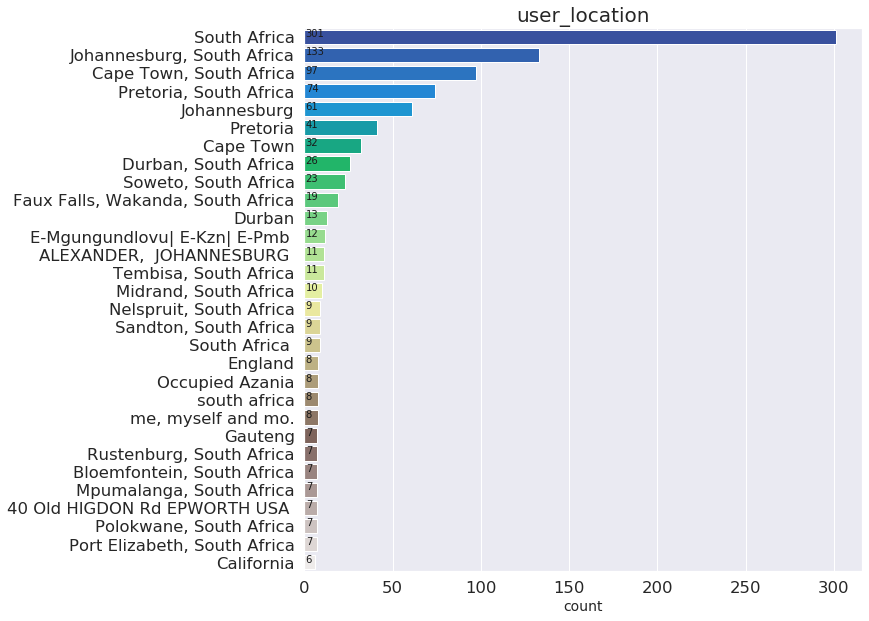

In [52]:
count =  mined_data['user_location'].value_counts()[:30]
drawbarplot(x=count.values,y=count.index, xlabel='count',title='user_location',figsize=(10,10))

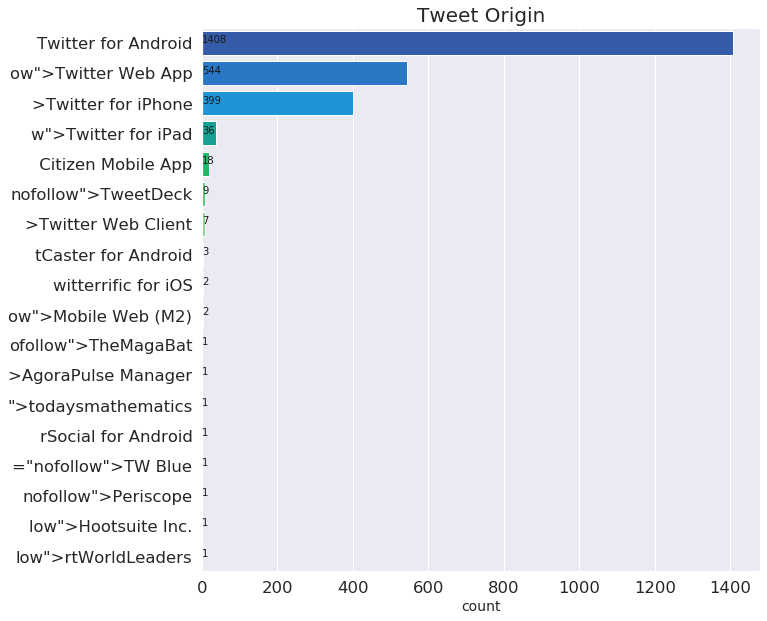

In [53]:
count = mined_data['source'].map(lambda x: str(x)[-23:-4]).value_counts()[:30]
drawbarplot(x=count.values,y=count.index, xlabel='count',title='Tweet Origin',figsize=(10,10))

## Last set of features

In [54]:
print('Total empty columns:', len(mined_data.columns) - len(mined_data.dropna(axis=1,how='all').columns))
filtered_class_1 = mined_data[Class_1].dropna(axis='columns', how='all')
print('Non-empty Class_1 columns:', len(filtered_class_1.columns))
filtered_class_2 = mined_data[Class_2].dropna(axis='columns', how='all')
print('Non-empty Class_2 columns:', len(filtered_class_2.columns))

Total empty columns: 41
Non-empty Class_1 columns: 49
Non-empty Class_2 columns: 249


In [55]:
mined_data = mined_data.dropna(axis=1,how='all')
mined_data.shape

(2436, 290)

# ... 17/12/2019 ...
### Week 2 work
#### Text cleaning

In [56]:
#select columns
# df_mention['mentions']
labels1 = ['user_screen_name', 'text', 'retweeted', 'lang', 'retweet_count', 'favorite_count']
tweets = mined_data[labels1]

# To display the entire text without it being Cut
pd.set_option('display.max_colwidth', -1)

In [57]:
tweets['text'] = tweets['text'].str.lower()
# Removing the links
tweets['text'] = tweets['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [58]:
# Removing the mensions
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

# remove twitter handles (@user)
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")

In [59]:
# Removing Punctuations, Numbers and Special characters (sometimes with emojis)
tweets['text'] = tweets['text'].str.replace("[^a-zA-Z# ]", "")

# # Removed all the emojis
# tweets['text'] = tweets['text'].apply(lambda x: x.decode('unicode_escape').\
#                                           encode('ascii', 'ignore').\
#                                           strip())

In [60]:
# Removing tweets with empty text
tweets = tweets[tweets['text']!= 'NaN']

In [61]:
# Dropping empty rows
tweets = tweets[tweets['text'] != '']
tweets = tweets.dropna(subset=['text'])

In [62]:
# Dropping duplicate rows
tweets.drop_duplicates(subset=['text'], keep=False);

In [63]:
# Resetting index
tweets = tweets.reset_index(drop=True)

In [64]:
tweets['text'] = tweets['text'].str.strip()

In [65]:
# Original Texts
mined_data['text'].head()

0    @o0KeepitReal0o @CyrilRamaphosa @PresidencyZA @MYANC It is rich coming from a BEE Billionaire.😂                                             
1    Higher Education, Science and Technology Minister, Dr Blade Nzimande will shortly brief the media on the implicatio… https://t.co/RwKd0LYpq4
2    @Kawasaki__900 @becsplanb @CyrilRamaphosa Rt. "Fmr Pres #Zuma says most of the witnesses who testified against him… https://t.co/hOppsH5otz 
3    Even the neighbors and the world at large.                                                                                                  
4    RT @GuiVanVeen: How members of the @ApcLive most likely under the orders of former MP @themba_godi pretend to be energy experts without hav…
Name: text, dtype: object

In [66]:
# old shape
tweets.shape# head(20)

(2415, 6)

In [67]:
# New shape
tweets.shape# head(20)

(2415, 6)

In [68]:
# New Text (Presumed to be clean :) )
tweets['text'].head()

0    it is rich coming from a bee billionaire                                                                         
1    higher education science and technology minister dr blade nzimande will shortly brief the media on the implicatio
2    rt fmr pres #zuma says most of the witnesses who testified against him                                           
3    even the neighbors and the world at large                                                                        
4    rt  how members of the  most likely under the orders of former mp  pretend to be energy experts without hav      
Name: text, dtype: object

In [69]:
# Old Text (Presumed dirty)
tweets['text'].head()

0    it is rich coming from a bee billionaire                                                                         
1    higher education science and technology minister dr blade nzimande will shortly brief the media on the implicatio
2    rt fmr pres #zuma says most of the witnesses who testified against him                                           
3    even the neighbors and the world at large                                                                        
4    rt  how members of the  most likely under the orders of former mp  pretend to be energy experts without hav      
Name: text, dtype: object

In [70]:
pd.set_option('display.max_colwidth', -1)
tweets['text'].head(20)

0     it is rich coming from a bee billionaire                                                                               
1     higher education science and technology minister dr blade nzimande will shortly brief the media on the implicatio      
2     rt fmr pres #zuma says most of the witnesses who testified against him                                                 
3     even the neighbors and the world at large                                                                              
4     rt  how members of the  most likely under the orders of former mp  pretend to be energy experts without hav            
5     every #goodgreendeed can help to reduce your impact on the environment and combat #climatechange  play your part       
6     #urgh                                                                                                                  
7     tag man of action                                                                                               

In [97]:
tweets.to_csv("twitters.csv")

**Pre-processing text data**: Most of the text data are cleaned by following below steps.
- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

# Remove stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    



tweets['text_punct'] = tweets['text'].apply(lambda x: remove_punct(x))
tweets['text_tokenized'] = tweets['text_punct'].apply(lambda x: tokenization(x.lower()))
tweets['text_nonstop'] = tweets['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [99]:
tweets.to_csv('tweets.csv')

In [73]:
tweets.head()

,user_screen_name,text,retweeted,lang,retweet_count,favorite_count,text_punct,text_tokenized,text_nonstop
0,potenzachip,it is rich coming from a bee billionaire,False,en,0,0,it is rich coming from a bee billionaire,"[it, is, rich, coming, from, a, bee, billionaire]","[rich, coming, bee, billionaire]"
1,SAgovnews,higher education science and technology minister dr blade nzimande will shortly brief the media on the implicatio,False,en,0,0,higher education science and technology minister dr blade nzimande will shortly brief the media on the implicatio,"[higher, education, science, and, technology, minister, dr, blade, nzimande, will, shortly, brief, the, media, on, the, implicatio]","[higher, education, science, technology, minister, dr, blade, nzimande, shortly, brief, media, implicatio]"
2,jillianalcott,rt fmr pres #zuma says most of the witnesses who testified against him,False,en,0,0,rt fmr pres zuma says most of the witnesses who testified against him,"[rt, fmr, pres, zuma, says, most, of, the, witnesses, who, testified, against, him]","[rt, fmr, pres, zuma, says, witnesses, testified]"
3,BisratGenet,even the neighbors and the world at large,False,en,0,0,even the neighbors and the world at large,"[even, the, neighbors, and, the, world, at, large]","[even, neighbors, world, large]"
4,Russell_Olivier,rt how members of the most likely under the orders of former mp pretend to be energy experts without hav,False,en,0,0,rt how members of the most likely under the orders of former mp pretend to be energy experts without hav,"[rt, how, members, of, the, most, likely, under, the, orders, of, former, mp, pretend, to, be, energy, experts, without, hav]","[rt, members, likely, orders, former, mp, pretend, energy, experts, without, hav]"


**Fetch sentiments**

We need to know the sentiment type of all the tweets, that can be done in two ways: 
- Using NLTK's SentimentIntensityAnalyzer (refered to as SIA)
- Using TextBlob

In [74]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [75]:
#SentimentIntensityAnalyzer
sentiments_using_SIA = tweets.text.apply(lambda text: fetch_sentiment_using_SIA(text))
print('SentimentIntensityAnalyzer: ', pd.DataFrame(sentiments_using_SIA.value_counts()))

SentimentIntensityAnalyzer:       text
pos  1919
neg  496 


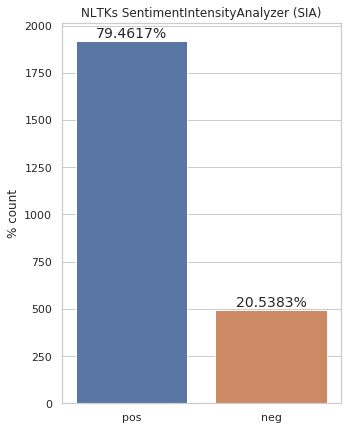

In [76]:
total_len = tweets.shape[0]
percentage_labels = (sentiments_using_SIA.value_counts()/total_len)*100
percentage_labels



sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(sentiments_using_SIA).set_title('NLTKs SentimentIntensityAnalyzer (SIA)')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.4f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('')
ax.set_ylabel("% count")
plt.show()

In [77]:
# SentimentIntensityAnalyzer
sentiments_using_SIA = tweets.text.apply(lambda text: fetch_sentiment_using_SIA(text))
print('SentimentIntensityAnalyzer: ', pd.DataFrame(sentiments_using_SIA.value_counts()))

SentimentIntensityAnalyzer:       text
pos  1919
neg  496 


In [78]:
# TextBlob
sentiments_using_textblob = tweets.text.apply(lambda text: fetch_sentiment_using_textblob(text))
print('# TextBlob: ', pd.DataFrame(sentiments_using_textblob.value_counts()))

# TextBlob:       text
pos  2037
neg  378 


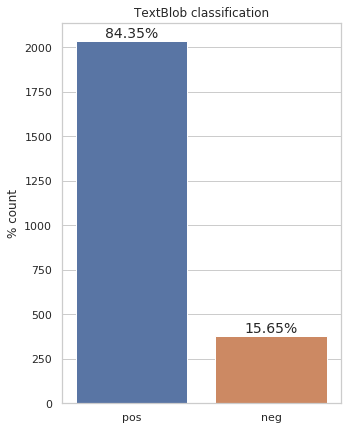

In [79]:
total_len = tweets.shape[0]
percentage_labels = (sentiments_using_textblob.value_counts()/total_len)*100
percentage_labels



sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5, 7))
sns.countplot(sentiments_using_textblob).set_title('TextBlob classification')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('')
ax.set_ylabel("% count")
plt.show()

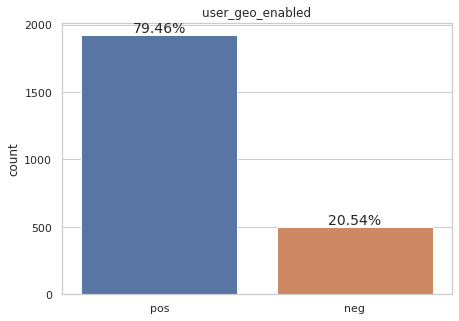

In [80]:
total_len = tweets.shape[0]
percentage_labels = (sentiments_using_textblob.value_counts()/total_len)*100
percentage_labels



sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(sentiments_using_SIA).set_title('user_geo_enabled')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel('')
ax.set_ylabel("count")
plt.show()

TextBlob and SIA, we'll choose the one that gives us more negative sentiments. In this case, we'll prefer SIA, since classfication seems better.

In [81]:
 tweets['sentiment'] = sentiments_using_SIA # sentiments_using_textblob

In [82]:
# Converting words to Lemma

# tweets['text_punct'] = tweets['text'].apply(lambda x: remove_punct(x))
# tweets['text_tokenized'] = tweets['text_punct'].apply(lambda x: tokenization(x.lower()))
# tweets['text_nonstop'] = tweets['text_tokenized'].apply(lambda x: remove_stopwords(x))

word_lemmatizer = WordNetLemmatizer()

tweets['text_lemmatized'] = tweets['text_nonstop'].apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
# text_nonstop.head()

# text_tokenized
# tweets['text_nonstop']

In [83]:
# Joining all tokens into sentences
for i, tokens in enumerate(tweets['text_tokenized']):
    tweets['text_tokenized'][i] = ' '.join(tokens)

tweets['absolute_tidy_tweets'] = tweets['text_tokenized']
# tweets.head(10)

In [84]:
# B. Pre-processing 'Key Phrases'

# a. Helper class, will help in preprocessing phrase terms

class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        """Finds NP (nounphrase) leaf nodes of a chunk tree."""
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        """Normalises words to lowercase and stems and lemmatizes it."""
        word = word.lower()
        # word = self.stemmer.stem_word(word) # We will loose the exact meaning of the word 
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        """Checks conditions for acceptable word: length, stopword. We can increase the length if we want to consider large phrase"""
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [85]:
# Grammatical rule to identify phrases

sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
chunker = nltk.RegexpParser(grammar)

In [86]:
# c. New feature called 'key_phrases', will contain phrases for corresponding tweet

key_phrases = []
phrase_extract_helper = PhraseExtractHelper()

for index, row in tweets.iterrows(): 
    toks = nltk.regexp_tokenize(row.text, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    tree = chunker.parse(postoks)

    terms = phrase_extract_helper.get_terms(tree)
    tweet_phrases = []

    for term in terms:
        if len(term):
            tweet_phrases.append(' '.join(term))
    
    key_phrases.append(tweet_phrases)

In [87]:
key_phrases[:10]

[['bee billionaire'],
 ['education science',
  'technology minister',
  'nzimande',
  'medium',
  'implicatio'],
 ['fmr pres', 'witness'],
 ['neighbor', 'world'],
 ['member', 'order', 'former', 'energy expert', 'hav'],
 ['goodgreendeed', 'impact', 'environment', 'combat climatechange', 'part'],
 ['urgh'],
 ['tag man', 'action'],
 ['minister', 'nzimande', 'medium', 'implication', 'matriculation result'],
 ['sadtu northern cape', 'vacant post', 'matricresults', 'safety', 'learner']]

In obtained key phrases, we can see words like 'year', 'talk', 'appl', 'compan' etc. are present which should never be considered as key phrases. There is one other simple way to extract key phrases, by using TextBlob (ConllExtractor).

In [88]:
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in tweets.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.text.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

# textblob_key_phrases[:10]
# These key phrases seem better, let's consider these key phrase only.
tweets['key_phrases'] = textblob_key_phrases

**Story Generation and Visualization**

In [89]:

# Most common words in positive tweets (Answer can be best found using WordCloud)

def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2', background_color="white").generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

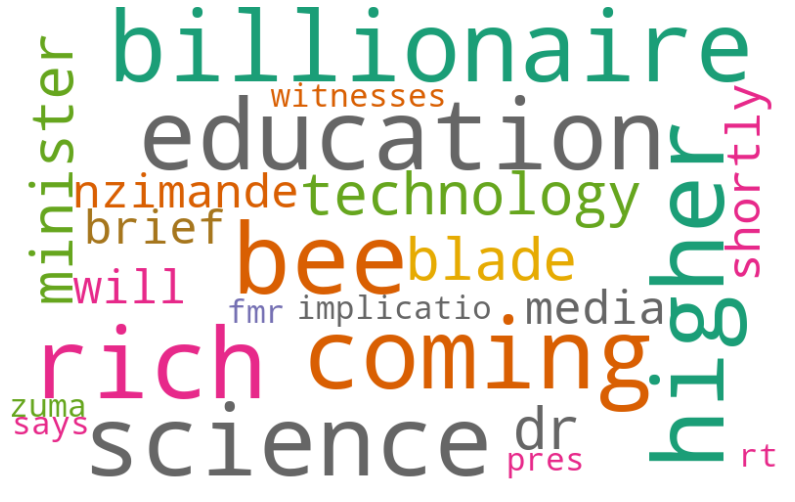

In [90]:
all_words = ' '.join([text for text in tweets['text'][tweets.sentiment == 'pos']])
generate_wordcloud(all_words[:200])

In [91]:
# tweets['key_phrases']

# all_words = ' '.join([text for text in tweets['text'][tweets.sentiment == 'pos']])
# generate_wordcloud(all_words[:200])

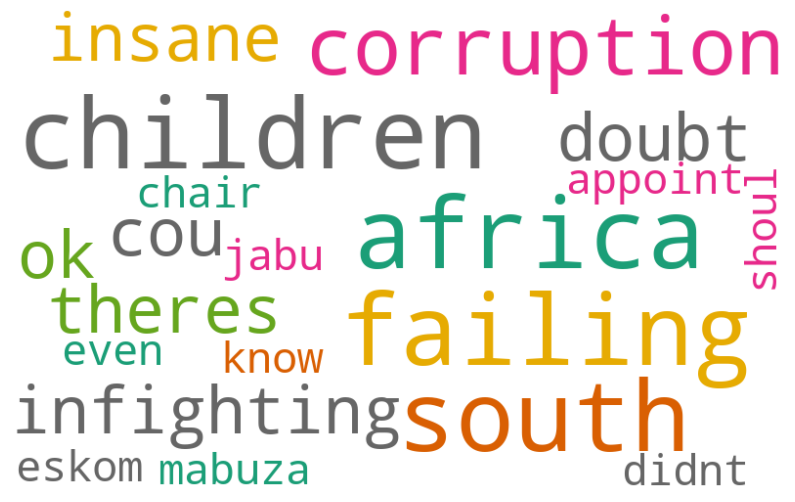

In [92]:
# Most common words in negative tweets

all_words = ' '.join([text for text in tweets['text'][tweets.sentiment == 'neg']])
generate_wordcloud(all_words[:200])

# The End of Dec work.

### So from here we need have an all hands on deck session to classify our tweets

# Week 1 (Jan 06, 2019) 
**Continue from here**

# Topic modeling, Method 1